In [3]:
import numpy as np
import matplotlib.pyplot as plt
import finesse
from finesse.knm import Map
from finesse.utilities.maps import circular_aperture

finesse.init_plotting()

In [4]:
aLIGO = finesse.Model()
aLIGO.parse(
    """
    # Constants ------------------------------------------------
    var mirror_mass 40
    var Larm 4000
    var itmT 0.014
    var etmT 5u
    var Rc_etm 2250
    var Rc_itm -1930
    
    var tsec1 0.3
    var tsec2 7.5u
    var tsec3 3.5u
    
    var lmichx 4.5
    var lmichy 4
    
    
    # 125 W Laser ------------------------------------------------
    l laser P=125
    
    s l_in laser.p1 prm1.p1
    
    
    # Power recycling cavity -----------------------------------
    m prm1 T=0.03 L=37.5u phi=0 Rc=10.948
    s prc prm1.p2 prm2.p1 L=16.6107
    bs prm2 R=0.9999 L=37.5u phi=0 Rc=-4.543
     
    s prm2_prm3 prm2.p2 prm3.p1 L=16.1648 
    bs prm3 L=37.5u phi=0 Rc=36.02  R=0.9999
    s prm3_bs prm3.p2 bs.p1 L=19.538
    
    # Arm cavities
    cav prcx prm1.p2.o itmx.p1.i
    cav prcy prm1.p2.o itmy.p1.i
    
    
    # Signal extracting cavity ---------------------------------
    bs sem1 T=tsec1 L=21.5u phi=0 Rc=36.013
    s bs_sem1 bs.p4 sem1.p1 L=19
    bs sem2 T=tsec2 L=8.5u phi=0 Rc=-5.678
    s sem1_sem2 sem1.p2 sem2.p1 L=15.7
    m sem3 T=tsec3 L=12.5u phi=0 Rc=-6.424
    s sem2_sem3 sem2.p2 sem3.p1 L=15.3
    
    cav ex itmx.p1.o sem3.p1.i
    cav ey itmy.p1.o sem3.p1.i
       
    
    # Beamsplitter --------------------------------------------
    #s lmod_bs mod.p2 bs.p1 L=1
    bs bs T=0.5 L=0 alpha=45
    
    
    # X arm ---------------------------------------------------
    s lx1 bs.p3 itmx.p1 L=0.3
    m itmx T=itmT L=37.5u phi=0 Rc=Rc_itm
    s LX itmx.p2 etmx.p1 L=Larm
    m etmx T=etmT L=37.5u phi=0 Rc=Rc_etm

    cav armx itmx.p2.o etmx.p1.i

    #pendulum sus_itmx itmx.mech mass=mirror_mass 
    #pendulum sus_etmx etmx.mech mass=mirror_mass 
    
    
    
    # Y arm --------------------------------------------------
    s ly1 bs.p2 itmy.p1 L=6u
    m itmy T=itmT L=37.5u phi=90 Rc=Rc_itm
    s LY itmy.p2 etmy.p1 L=Larm
    m etmy T=etmT L=37.5u phi=90 Rc=Rc_etm

    cav army itmy.p2.o etmy.p1.i

    #pendulum sus_itmy itmy.mech mass=mirror_mass 
    #pendulum sus_etmy etmy.mech mass=mirror_mass 
    


    # PDs ----------------------------------------------------
    pd pdtrans node=sem3.p2.o    
    pd pdref node=prm1.p1.o
    pd pdcirc node=itmx.p2.i
    
    
    
    xaxis(itmx.phi, lin, 0, 360, 10000)
    """
)

C:\ProgramData\Anaconda3\envs\finesse3C\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


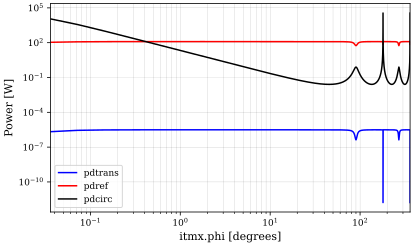

╒═══════════════════════╤═══════════════════════════════════╕
│ Description           │ Value                             │
╞═══════════════════════╪═══════════════════════════════════╡
│ FSR                   │ 2980044.314115308                 │
├───────────────────────┼───────────────────────────────────┤
│ Loss                  │ 0.8792328100144948                │
├───────────────────────┼───────────────────────────────────┤
│ Finesse               │ 2.678429719304524                 │
├───────────────────────┼───────────────────────────────────┤
│ FWHM                  │ 1112608.739604749                 │
├───────────────────────┼───────────────────────────────────┤
│ Storage time          │ 2.8609328225919683e-07            │
├───────────────────────┼───────────────────────────────────┤
│ Pole                  │ 556304.3698023745                 │
├───────────────────────┼───────────────────────────────────┤
│ Round trip length     │ 100.6                             │
├───────

C:\ProgramData\Anaconda3\envs\finesse3C\lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


In [5]:
out = aLIGO.run()
out.plot(log=True, separate=False);

print(aLIGO.ex.info_parameter_table(), aLIGO.ey.info_parameter_table())

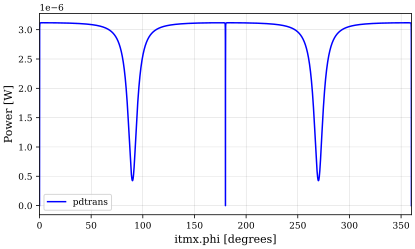

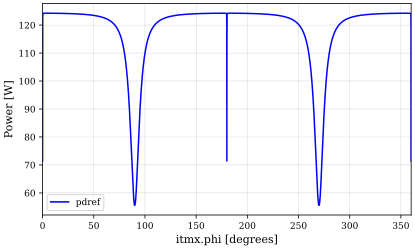

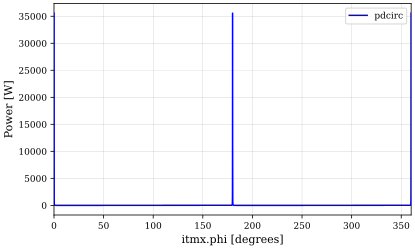

{finesse.detectors.powerdetector.PowerDetector: <Figure size 576x355.968 with 1 Axes>,
 'pdcirc': <Figure size 576x355.968 with 1 Axes>}

In [6]:
out.plot('pdtrans')
out.plot('pdref')
out.plot('pdcirc')